<a href="https://colab.research.google.com/github/Serbeld/Practicas-de-Python-con-JupyterNotebook/blob/master/Series_de_tiempo_con_deteccion_de_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Series de tiempo con detección de anomalías**

**Autor:** Sergio Luis Beleño Díaz

**Fecha:** 14 de julio del 2020


In [1]:
import bz2
from scipy.stats import norm
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd

In [2]:
######################################################
# Esta sección solo es necesaria para Google Colab
from google.colab import drive
import sys

drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/')
######################################################

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Estados iniciales

matrix_data = []
vec_data = []
cont = 0
cont2 = 0
n = 0


In [4]:
# Se cambia el path dependiendo de la ubicación del archivo o base de datos

path = "/content/drive/My Drive/kk.dat.bz2"

with bz2.open(path, "rt" ) as bz_file:
    for line in bz_file: #se lee linea a linea del archivo
        rline = line.rstrip('\n').split(' ') #se desconcatena
        cont += 1
        if cont > 49: #justo ene sa linea los datos siguen una estructura secuencial
            if rline[0] == "#":
                if len(rline) == 3: ##fin de linea de pulso
                    n = 0
                if len(rline) == 4:
                    if n == 12:
                        #print('Funciona')
                        matrix_data.append(vec_data) #se va guardando en la matriz de datos
                        vec_data = [] #se reinicializa el vector
                        #break
                    else:
                        vec_data = [] # en caso de estar incompleto el vector, no se guarda
                        # pero si se inicializa
            else:
                n += 1
                cont2 += 1
                vec_data.append(int(rline[0]))
                #if cont2 == 50:
                 #   #print(vec_data)
                  #  break
ml = np.asarray(matrix_data)- 50 #resto el valor del offset de la electrónica del detector
ml = ml
x_num_fil, y = ml.shape

In [5]:
# Tamaño de la data
print("El tamaño de la data es: " + str(ml.shape))

# Primer dato
print("El primer pulso es de: " + str(ml[0]))
print()

# ultimo dato
print("El ultimo pulso es de: " + str(ml[1420]))

vector_de_voltajes = []

for i in range(0,len(ml)):
    for n in range(0,12):
        vector_de_voltajes.append(ml[i,n])


El tamaño de la data es: (1421, 12)
El primer pulso es de: [  0   1 581 201  89  87  37  12   0   0  -4  -2]

El ultimo pulso es de: [  0   0 298 297 134  85  -1   1  -1  -1   0   0]


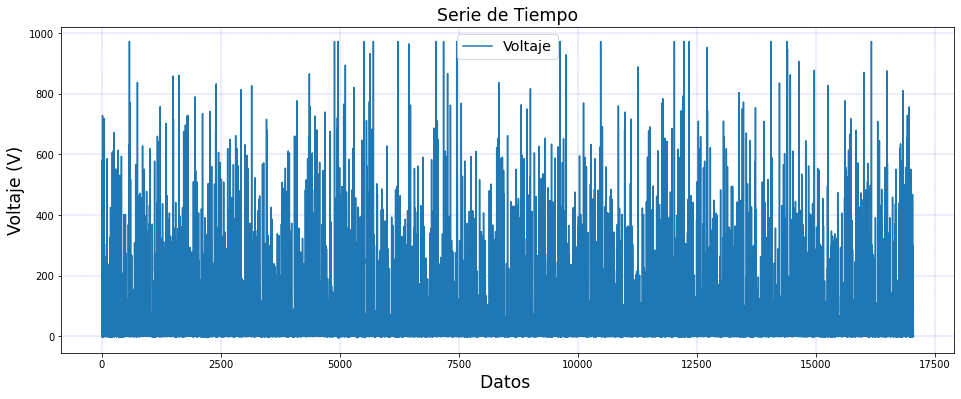

In [6]:
# Graficas

pl.rcParams['figure.figsize'] = (16.0, 6.0)

data = pd.DataFrame(vector_de_voltajes)
data.plot()

pl.title("Serie de Tiempo", fontsize='xx-large')
pl.xlabel("Datos ",fontsize = 'xx-large')
pl.ylabel("Voltaje (V)",fontsize = 'xx-large')
pl.legend(['Voltaje'], fontsize='x-large')
pl.grid(color='b', ls = '-.', lw = 0.2)

#Para guardar imagen
#pl.savefig("Serie_de_tiempo_completa_version_1.png", bbox_inches='tight')

pl.show()


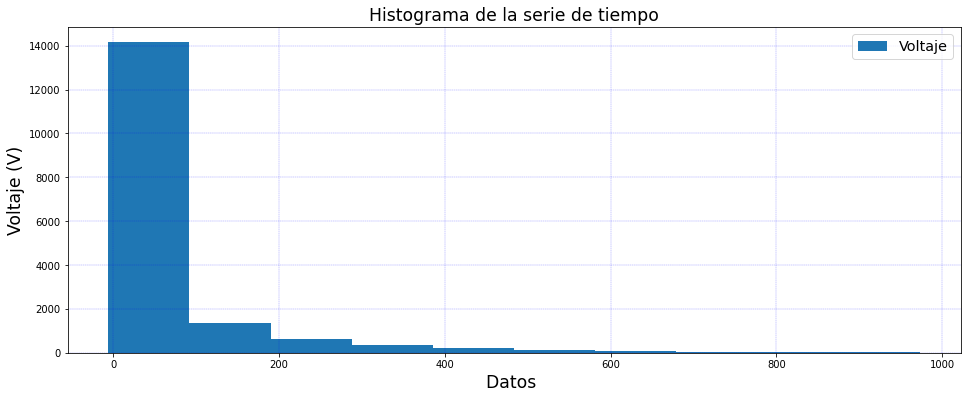

In [7]:
# Histograma

data.hist()

pl.xlabel("Datos ",fontsize = 'xx-large')
pl.ylabel("Voltaje (V)",fontsize = 'xx-large')
pl.legend(['Voltaje'], fontsize='x-large')
pl.title("Histograma de la serie de tiempo", fontsize='xx-large')
pl.grid(color='b', ls = '-.', lw = 0.2)

#Para guardar imagen
#pl.savefig("Serie_de_tiempo_histograma.png", bbox_inches='tight')

pl.show()


In [8]:
#Print std
print("La estadisticas de los datos es de: " + str(data.std()))


La estadisticas de los datos es de: 0    117.414832
dtype: float64


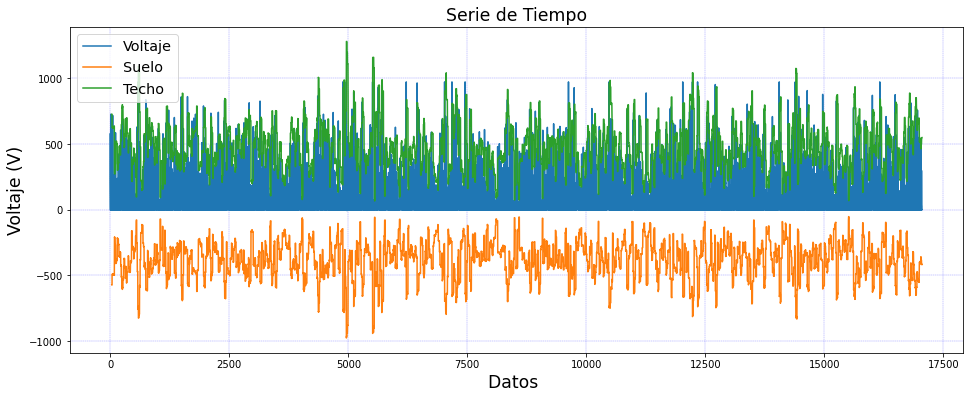

In [9]:
#############################################################################
# Techo y suelo

# Ventaneo
wind = 36

# Aumento de amplitud
sigma = 4

data["suelo"] = data[0].rolling(window=wind)\
    .mean() - (sigma * data[0].rolling(window=wind).std())
data["techo"] = data[0].rolling(window=wind)\
    .mean() + (sigma * data[0].rolling(window=wind).std())
data.plot()

pl.xlabel("Datos ",fontsize = 'xx-large')
pl.ylabel("Voltaje (V)",fontsize = 'xx-large')
pl.title("Serie de Tiempo", fontsize='xx-large')
pl.legend(['Voltaje','Suelo',"Techo"], fontsize='x-large')
pl.grid(color='b', ls = '-.', lw = 0.2)

#Para guardar imagen
#pl.savefig("Serie_de_tiempo_histograma.png", bbox_inches='tight')

pl.show()


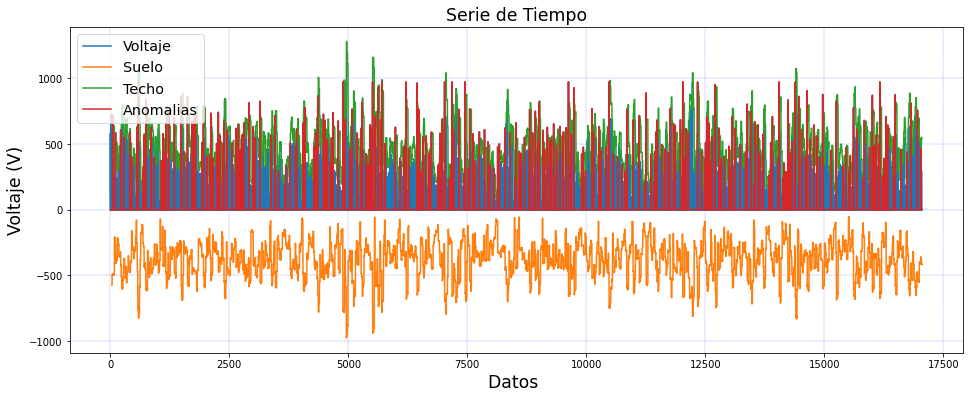

In [10]:
# Anomalias

data["anom"] = data.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

data.plot()

pl.xlabel("Datos ",fontsize = 'xx-large')
pl.ylabel("Voltaje (V)",fontsize = 'xx-large')
pl.title("Serie de Tiempo", fontsize='xx-large')
pl.legend(['Voltaje','Suelo',"Techo","Anomalias"], fontsize='x-large')
pl.grid(color='b', ls = '-.', lw = 0.2)

#Para guardar imagen
#pl.savefig("Serie_de_tiempo_histograma.png", bbox_inches='tight')

pl.show()